Import the Kaggle dataset into google colab

In [1]:
#If you don't have kagglehub, install it with pip install kagglehub
#also install, pip install kaggle
import kagglehub
path = kagglehub.dataset_download("ianktoo/simulated-roads-accident-data")

c:\Users\Saviru Mendis\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import kruskal
import scipy.stats as stats

Assingning each dataset into seperate variables

In [3]:
import os

df1 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_2k.csv"))
df2 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_10k.csv"))
df3 = pd.read_csv(os.path.join(path, "synthetic_road_accidents_100k.csv"))




Checking the datasets are imported correctly

In [4]:
df1.head()
df2.head()
df3.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,rural,2,0.29,70,night,rainy,False,True,evening,False,False,1,0.64
1,highway,1,0.34,25,dim,clear,False,False,morning,False,False,3,0.27
2,rural,2,0.76,70,night,foggy,True,False,evening,True,True,1,0.76
3,rural,3,0.37,70,night,foggy,True,False,morning,False,True,0,0.60
4,highway,3,0.39,45,dim,rainy,False,True,morning,False,False,0,0.17


Combine all three datasets into a single dataframe.

In [5]:
_df = pd.concat([df1, df2, df3])
print(_df.shape)

(112000, 13)


In [6]:
print(f"Number of duplicate rows in the DF: {_df.duplicated().sum()}")

Number of duplicate rows in the DF: 39


In [7]:
#Final combined dataframe
_df = _df.drop_duplicates()
print(f"Number of duplicates after removal: {_df.duplicated().sum()}")
print(f"Shape of the df after removal: {_df.shape}")


Number of duplicates after removal: 0
Shape of the df after removal: (111961, 13)


In [8]:
#Dataframe description
print(_df.describe())

           num_lanes      curvature    speed_limit  num_reported_accidents  \
count  111961.000000  111961.000000  111961.000000           111961.000000   
mean        2.495780       0.500565      47.079787                1.503372   
std         1.118754       0.288637      16.326468                1.227422   
min         1.000000       0.000000      25.000000                0.000000   
25%         1.000000       0.250000      35.000000                1.000000   
50%         2.000000       0.500000      45.000000                1.000000   
75%         3.000000       0.750000      60.000000                2.000000   
max         4.000000       1.000000      70.000000               10.000000   

       accident_risk  
count  111961.000000  
mean        0.382977  
std         0.179020  
min         0.000000  
25%         0.250000  
50%         0.380000  
75%         0.510000  
max         1.000000  


In [9]:
#Dataframe column information
print(_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 111961 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               111961 non-null  object 
 1   num_lanes               111961 non-null  int64  
 2   curvature               111961 non-null  float64
 3   speed_limit             111961 non-null  int64  
 4   lighting                111961 non-null  object 
 5   weather                 111961 non-null  object 
 6   road_signs_present      111961 non-null  bool   
 7   public_road             111961 non-null  bool   
 8   time_of_day             111961 non-null  object 
 9   holiday                 111961 non-null  bool   
 10  school_season           111961 non-null  bool   
 11  num_reported_accidents  111961 non-null  int64  
 12  accident_risk           111961 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 9.0+ MB
None


***Since the above output says***

***"""
Index: 111961 entries, 0 to 99999
"""***

***we need to reset the index column.***



In [10]:
#final_df with corrected column indexes.
_df.reset_index(drop = True, inplace = True)
print(_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111961 entries, 0 to 111960
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               111961 non-null  object 
 1   num_lanes               111961 non-null  int64  
 2   curvature               111961 non-null  float64
 3   speed_limit             111961 non-null  int64  
 4   lighting                111961 non-null  object 
 5   weather                 111961 non-null  object 
 6   road_signs_present      111961 non-null  bool   
 7   public_road             111961 non-null  bool   
 8   time_of_day             111961 non-null  object 
 9   holiday                 111961 non-null  bool   
 10  school_season           111961 non-null  bool   
 11  num_reported_accidents  111961 non-null  int64  
 12  accident_risk           111961 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 8.1+ MB
None


In [11]:
_df_copy = _df.copy()

***Here we plit our data into 70% ( Training set ) and 30% ( Testing set )***

In [12]:

X = _df_copy.drop(["accident_risk"], axis = 1)
y = _df_copy["accident_risk"]

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
f_df = pd.concat([X_train, y_train], axis = 1)
print(f_df.shape)

(78372, 13)


In [14]:
f_df = pd.concat([X_train, y_train], axis=1)


In [15]:
print(f_df.head())

      road_type  num_lanes  curvature  speed_limit  lighting weather  \
80965     rural          2       0.69           25  daylight   clear   
73776     urban          1       0.97           35     night   clear   
22848   highway          3       0.31           35       dim   foggy   
31456   highway          3       0.74           45     night   clear   
19772     urban          3       0.86           60  daylight   rainy   

       road_signs_present  public_road time_of_day  holiday  school_season  \
80965                True         True   afternoon    False           True   
73776               False         True     morning    False           True   
22848               False         True     morning     True          False   
31456                True        False   afternoon     True          False   
19772                True        False   afternoon     True          False   

       num_reported_accidents  accident_risk  
80965                       2           0.19  
7377

count    78372.000000
mean         0.383162
std          0.179432
min          0.000000
25%          0.250000
50%          0.380000
75%          0.510000
max          1.000000
Name: accident_risk, dtype: float64


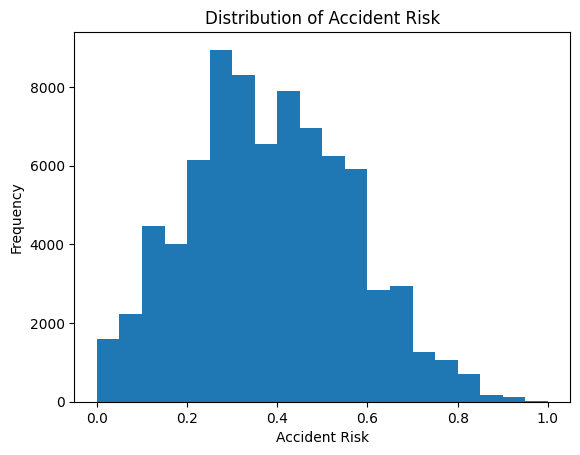

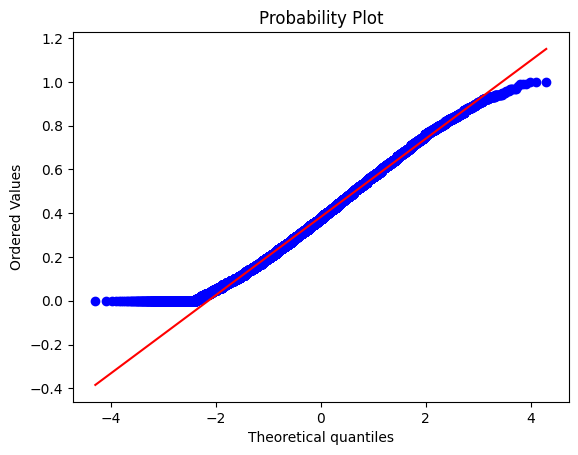

In [16]:
#target variable analysis
print(y_train.describe())

plt.hist(y_train, bins=20)
plt.xlabel("Accident Risk")
plt.ylabel("Frequency")
plt.title("Distribution of Accident Risk")
plt.show()

stats.probplot(f_df['accident_risk'], dist="norm", plot=plt)
plt.show()

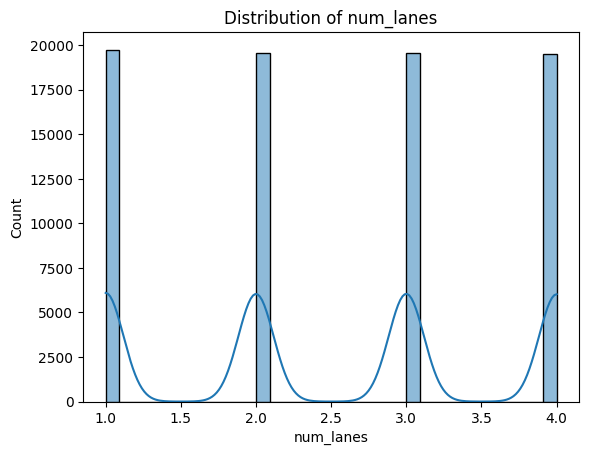

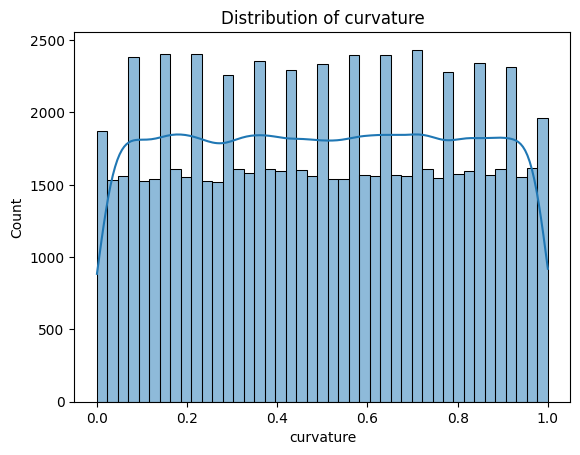

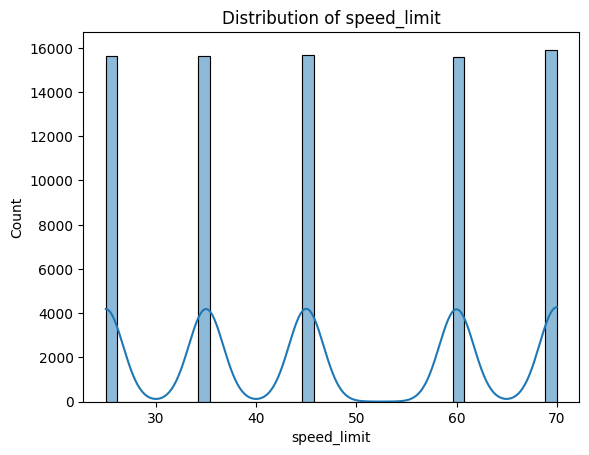

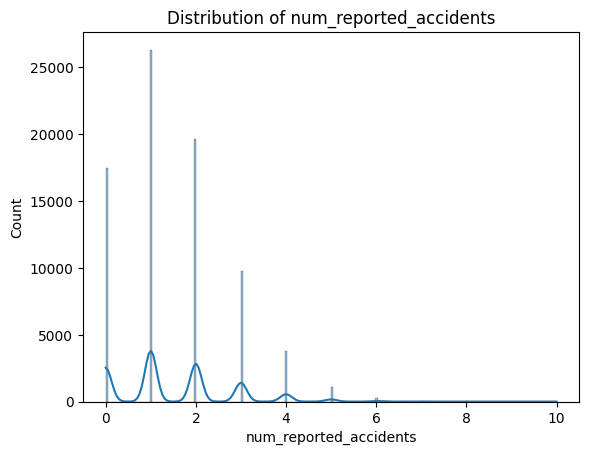

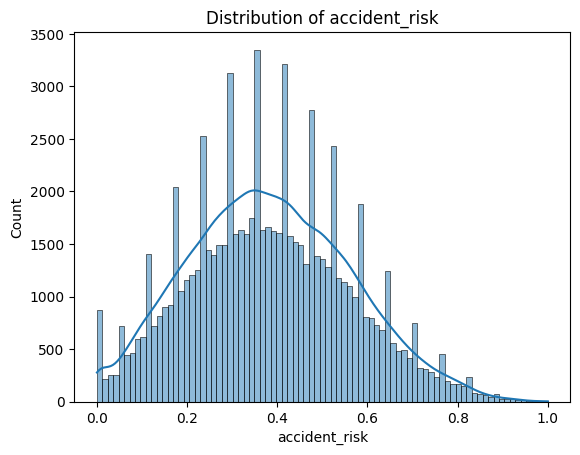

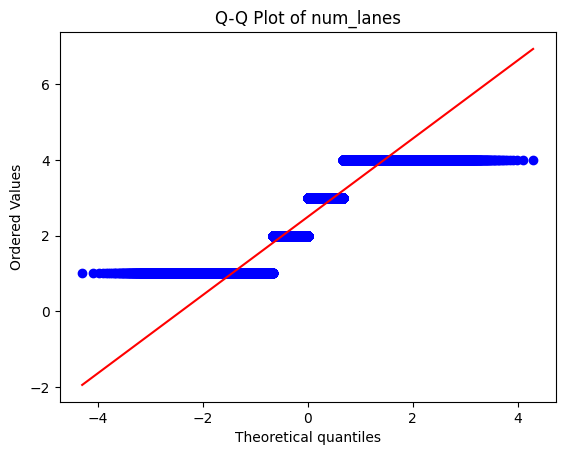

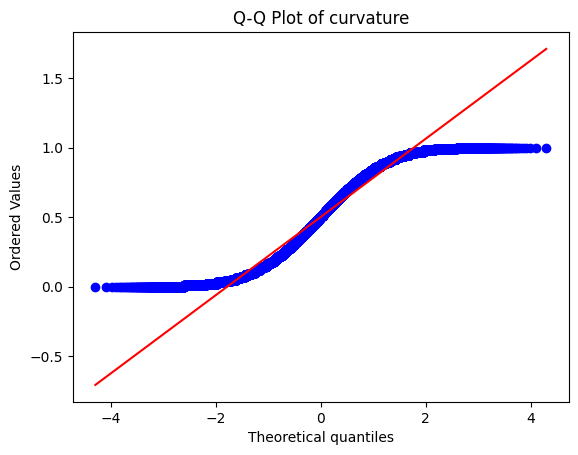

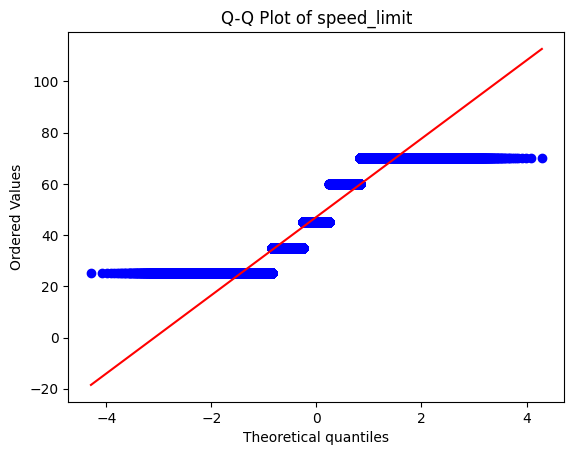

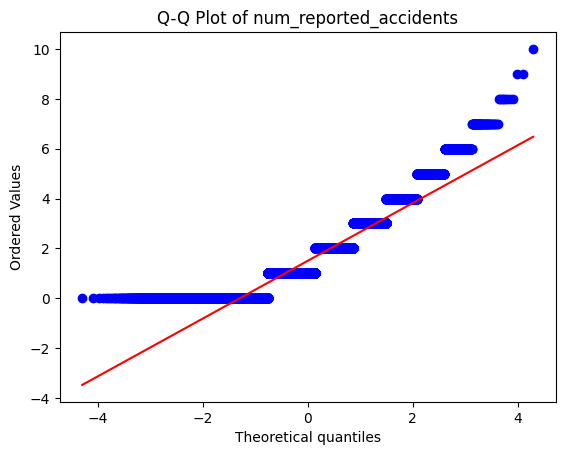

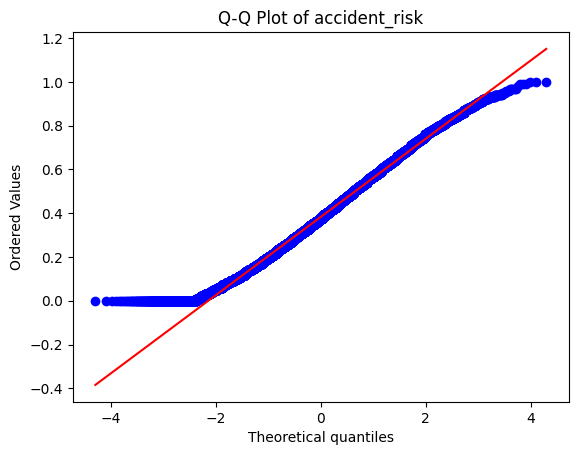

In [17]:
#checking distribution of numerical columns


num_cols = [
    'num_lanes', 'curvature', 'speed_limit',
    'num_reported_accidents', 'accident_risk'
]

for col in num_cols:
    sns.histplot(f_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


for col in num_cols:
    stats.probplot(f_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

In [18]:
from scipy.stats import kstest

for col in num_cols:
    z = (f_df[col] - f_df[col].mean()) / f_df[col].std()
    stat, p = kstest(z, 'norm')
    print(f'{col}: p-value = {p}')
    if p < 0.05:
        print(f'{col} does not follow a normal distribution (reject H0)\n')
    else:
        print(f'{col} follows a normal distribution (fail to reject H0)\n')   


num_lanes: p-value = 0.0
num_lanes does not follow a normal distribution (reject H0)

curvature: p-value = 1.0467277999888937e-264
curvature does not follow a normal distribution (reject H0)

speed_limit: p-value = 0.0
speed_limit does not follow a normal distribution (reject H0)

num_reported_accidents: p-value = 0.0
num_reported_accidents does not follow a normal distribution (reject H0)

accident_risk: p-value = 1.3549532033699713e-55
accident_risk does not follow a normal distribution (reject H0)



In [19]:
#1. Road Design / Infrastructure (Controllable Factors)
#These variables describe the characteristics of roads

road_design_vars = ['road_type', 'num_lanes', 'curvature', 'public_road']


road_type
highway    0.383118
rural      0.381963
urban      0.384394
Name: accident_risk, dtype: float64


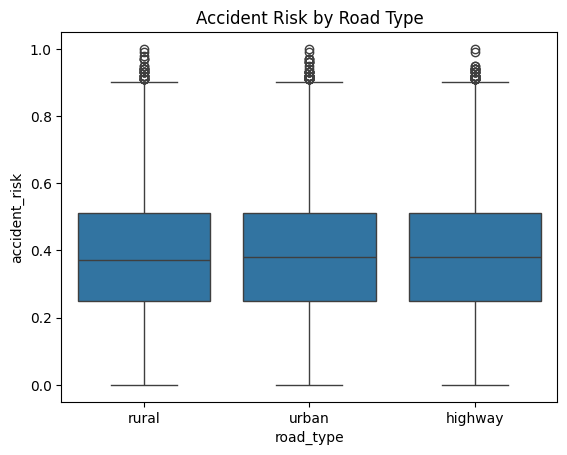

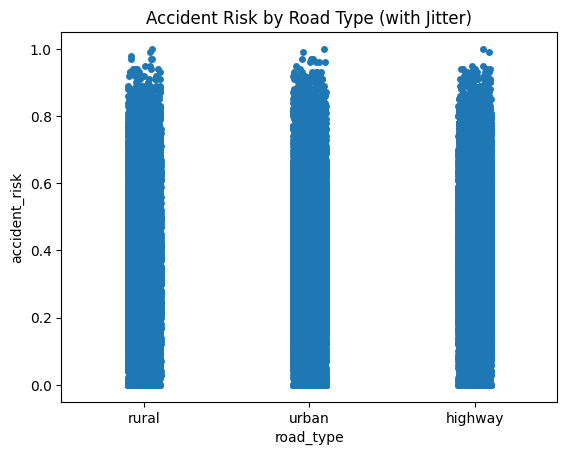

In [20]:
#Average accident risk by road type
print(f_df.groupby('road_type')['accident_risk'].mean())

sns.boxplot(x='road_type', y='accident_risk', data=f_df)
plt.title("Accident Risk by Road Type")
plt.show()

sns.stripplot(x='road_type', y='accident_risk', data=f_df, jitter=True)
plt.title("Accident Risk by Road Type (with Jitter)")
plt.show()

In [21]:
#Statistical test: Kruskal-Wallis H-test for road_type
#p < 0.05 → variable is important
#p ≥ 0.05 → limited evidence of importance
groups = [
    f_df[f_df['road_type'] == rt]['accident_risk']
    for rt in f_df['road_type'].unique()
]

kruskal(*groups)


KruskalResult(statistic=np.float64(3.2055083135512437), pvalue=np.float64(0.20134122836000765))

num_lanes
1    0.382015
2    0.383555
3    0.383114
4    0.383978
Name: accident_risk, dtype: float64


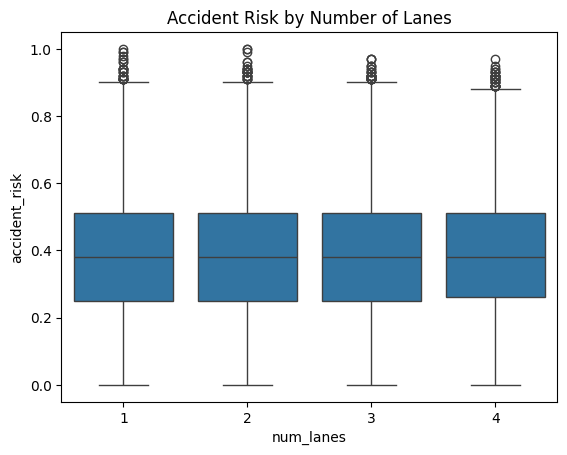

In [22]:
#number of lanes vs accident risk
print(f_df.groupby('num_lanes')['accident_risk'].mean())

sns.boxplot(x='num_lanes', y='accident_risk', data=f_df)
plt.title("Accident Risk by Number of Lanes")   
plt.show()

In [23]:
from scipy.stats import spearmanr

#Statistical test: Spearman's rank correlation for num_lanes
corr, p_value = spearmanr(f_df['num_lanes'], f_df['accident_risk'])
print("Spearman correlation:", corr)
print("p-value:", p_value)        



Spearman correlation: 0.0026967677895685213
p-value: 0.45027930633338187


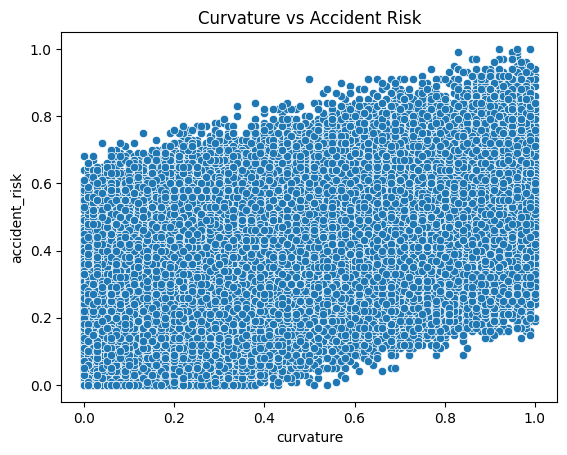

               curvature  accident_risk
curvature       1.000000       0.480446
accident_risk   0.480446       1.000000


In [24]:
#curvature vs accident risk

sns.scatterplot(x='curvature', y='accident_risk', data=f_df)
plt.title("Curvature vs Accident Risk")
plt.show()

print(f_df[['curvature', 'accident_risk']].corr())

public_road
False    0.383526
True     0.382796
Name: accident_risk, dtype: float64


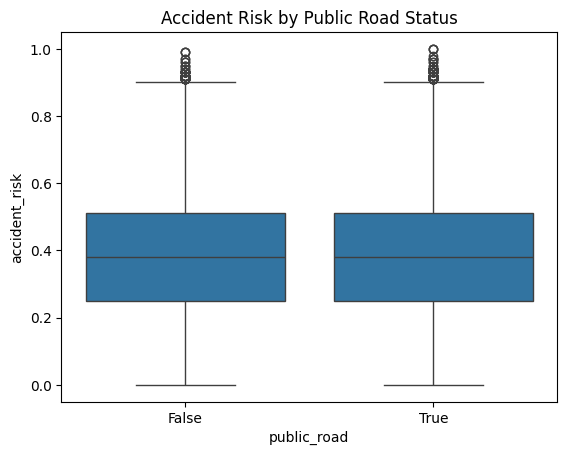

In [25]:
#public road vs accident risk
print(f_df.groupby('public_road')['accident_risk'].mean())

sns.boxplot(x='public_road', y='accident_risk', data=f_df)
plt.title("Accident Risk by Public Road Status")
plt.show()

In [26]:
from scipy.stats import mannwhitneyu

group1 = f_df[f_df['public_road'] == True]['accident_risk']
group2 = f_df[f_df['public_road'] == False]['accident_risk']

mannwhitneyu(group1, group2)


MannwhitneyuResult(statistic=np.float64(765635243.5), pvalue=np.float64(0.5009931609841625))

In [27]:
#2. Traffic Regulation (Control Factors)
#these variables represent rules and control mechanisms that influence driver behavior
traffic_control_vars = ['speed_limit', 'road_signs_present']


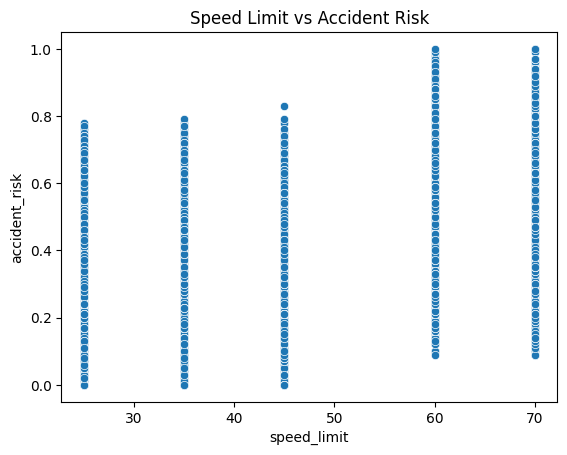

               speed_limit  accident_risk
speed_limit       1.000000       0.494303
accident_risk     0.494303       1.000000


In [28]:
#speed limit vs accident risk
sns.scatterplot(x='speed_limit', y='accident_risk', data=f_df)
plt.title("Speed Limit vs Accident Risk")
plt.show()

print(f_df[['speed_limit', 'accident_risk']].corr())


In [29]:
#Statistical test: Spearman's rank correlation for speed_limit
#p < 0.05 → speed limit is statistically important
#|corr| magnitude → strength of importance
from scipy.stats import spearmanr

corr, p_value = spearmanr(
    f_df['speed_limit'],
    f_df['accident_risk']
)

print("Spearman correlation:", corr)
print("p-value:", p_value)


Spearman correlation: 0.4759844259199732
p-value: 0.0


road_signs_present
False    0.382818
True     0.383507
Name: accident_risk, dtype: float64


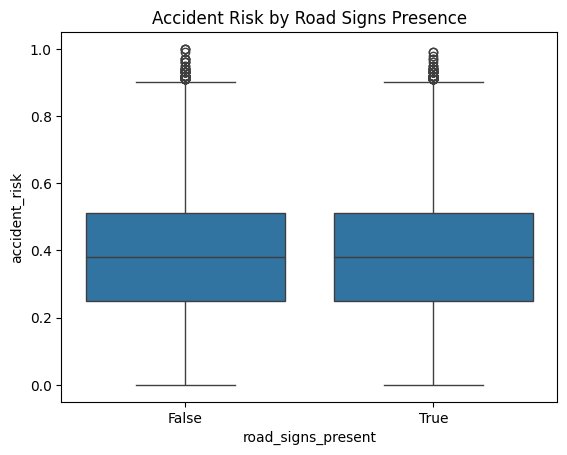

In [30]:
print(f_df.groupby('road_signs_present')['accident_risk'].mean())

sns.boxplot(x='road_signs_present', y='accident_risk', data=f_df)
plt.title("Accident Risk by Road Signs Presence")
plt.show()



In [31]:
group1 = f_df[f_df['road_signs_present'] == True]['accident_risk']
group2 = f_df[f_df['road_signs_present'] == False]['accident_risk']     
mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=np.float64(769676988.5), pvalue=np.float64(0.5472094729189949))

In [32]:
#3. Environmental Conditions (Uncontrollable Factors)
environment_vars = ['weather', 'lighting']



weather
clear    0.317650
foggy    0.415853
rainy    0.417109
Name: accident_risk, dtype: float64


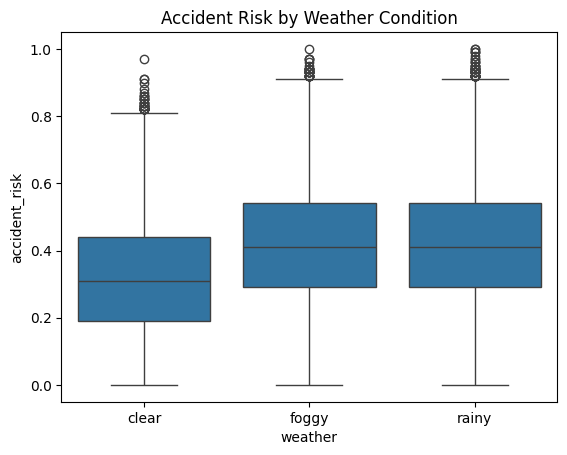

In [33]:
#weather vs accident risk
print(f_df.groupby('weather')['accident_risk'].mean())

sns.boxplot(x='weather', y='accident_risk', data=f_df)
plt.title("Accident Risk by Weather Condition")
plt.show()


In [34]:
groups = [
    f_df[f_df['weather'] == w]['accident_risk'] 
    for w in f_df['weather'].unique()
]   
kruskal(*groups)
#p < 0.05 → weather is statistically important
#p ≥ 0.05 → limited evidence of importance

KruskalResult(statistic=np.float64(5011.015013695776), pvalue=np.float64(0.0))

lighting
daylight    0.316879
dim         0.316945
night       0.515351
Name: accident_risk, dtype: float64


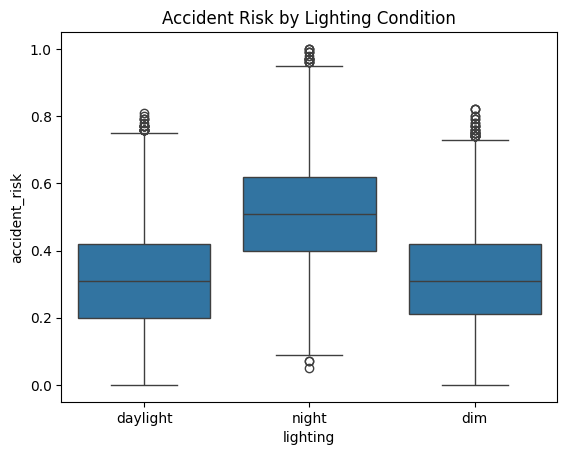

In [35]:
#lighting vs accident risk
print(f_df.groupby('lighting')['accident_risk'].mean())

sns.boxplot(x='lighting', y='accident_risk', data=f_df)
plt.title("Accident Risk by Lighting Condition")
plt.show()


In [36]:
groups = [
    f_df[f_df['lighting'] == l]['accident_risk']
    for l in f_df['lighting'].unique()
]
kruskal(*groups)

KruskalResult(statistic=np.float64(20703.1190380875), pvalue=np.float64(0.0))

In [37]:
#4. Human Activity Context
human_context_vars = ['time_of_day', 'holiday', 'school_season']


time_of_day
afternoon    0.383774
evening      0.384157
morning      0.381572
Name: accident_risk, dtype: float64


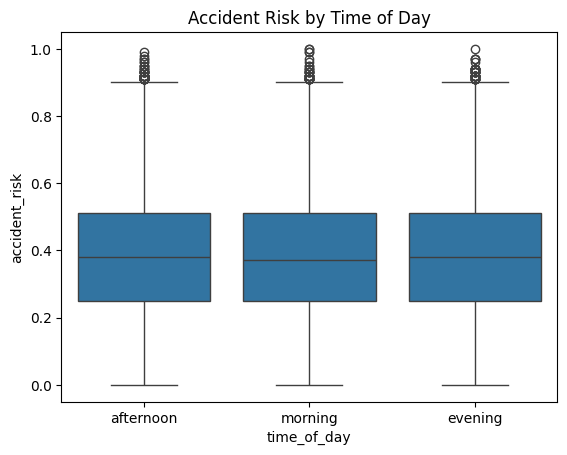

In [38]:
#time of day vs accident risk
print(f_df.groupby('time_of_day')['accident_risk'].mean())

sns.boxplot(x='time_of_day', y='accident_risk', data=f_df)
plt.title("Accident Risk by Time of Day")
plt.show()

holiday
False    0.383773
True     0.382559
Name: accident_risk, dtype: float64


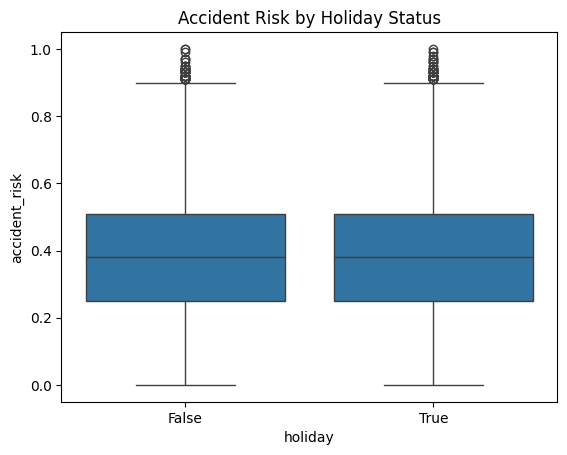

In [39]:
#holiday vs accident risk
print(f_df.groupby('holiday')['accident_risk'].mean())

sns.boxplot(x='holiday', y='accident_risk', data=f_df)
plt.title("Accident Risk by Holiday Status")    
plt.show()

school_season
False    0.383388
True     0.382935
Name: accident_risk, dtype: float64


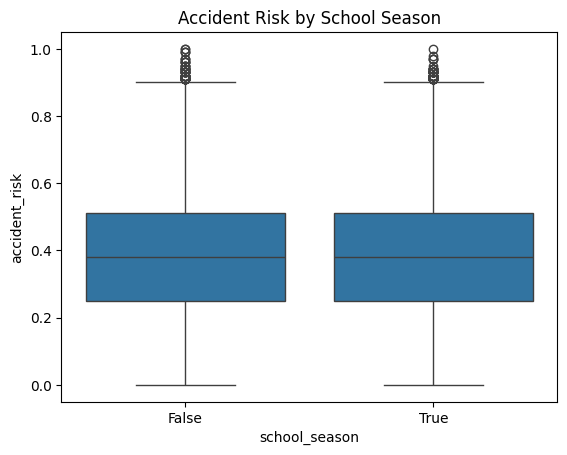

In [40]:
#school season vs accident risk
print(f_df.groupby('school_season')['accident_risk'].mean())

sns.boxplot(x='school_season', y='accident_risk', data=f_df)
plt.title("Accident Risk by School Season")     
plt.show()


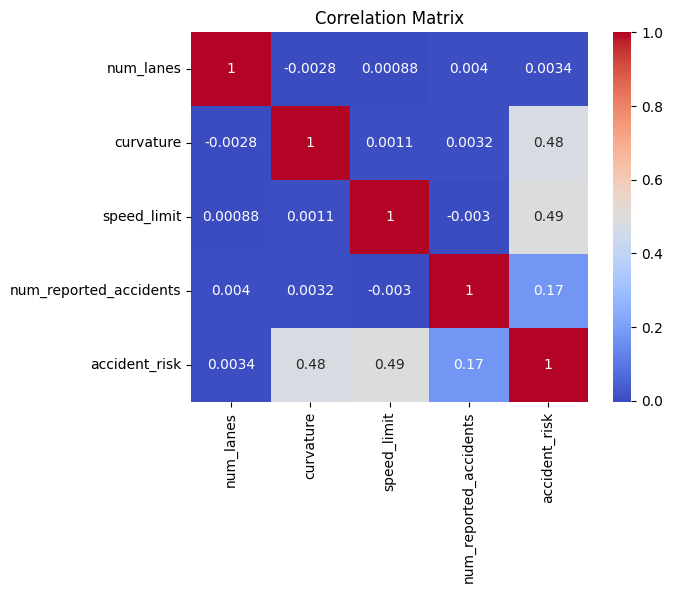

In [41]:
#Correlation matrix for numerical variables
num_vars = ['num_lanes', 'curvature', 'speed_limit', 
            'num_reported_accidents', 'accident_risk']

sns.heatmap(f_df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [42]:
#Mutual Information Analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
y = f_df["accident_risk"]
X = f_df.drop(columns=["accident_risk","num_reported_accidents"])

X_encoded = X.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == "object" or X_encoded[col].dtype == "bool":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

mi_scores = mutual_info_regression(X_encoded, y, random_state=42)

mi_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "MI Score": mi_scores
})

mi_df = mi_df.sort_values(by="MI Score", ascending=False)
print(mi_df)

               Feature  MI Score
3          speed_limit  0.178786
4             lighting  0.156406
2            curvature  0.152034
5              weather  0.043926
6   road_signs_present  0.002682
9              holiday  0.002283
8          time_of_day  0.001878
7          public_road  0.001536
10       school_season  0.000779
1            num_lanes  0.000000
0            road_type  0.000000


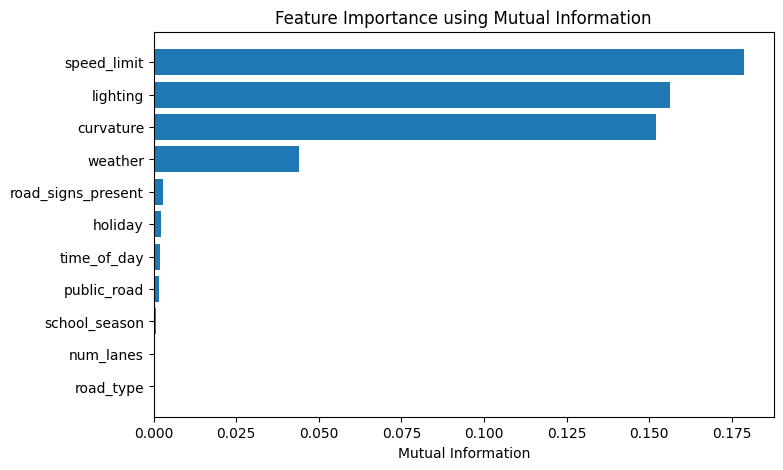

In [43]:
#Plotting Mutual Information Scores
plt.figure(figsize=(8,5))
plt.barh(mi_df["Feature"], mi_df["MI Score"])
plt.xlabel("Mutual Information")
plt.title("Feature Importance using Mutual Information")
plt.gca().invert_yaxis()
plt.show()

Mean Squared Error: 0.0028
R2 Score: 0.9134
                    feature  importance
14              speed_limit    0.307339
3            lighting_night    0.270513
13                curvature    0.251587
15   num_reported_accidents    0.056452
5             weather_rainy    0.036088
4             weather_foggy    0.031675
12                num_lanes    0.009927
11       school_season_True    0.004540
6   road_signs_present_True    0.004515
10             holiday_True    0.004499
7          public_road_True    0.004487
1           road_type_urban    0.003881
0           road_type_rural    0.003866
9       time_of_day_morning    0.003865
8       time_of_day_evening    0.003820
2              lighting_dim    0.002947


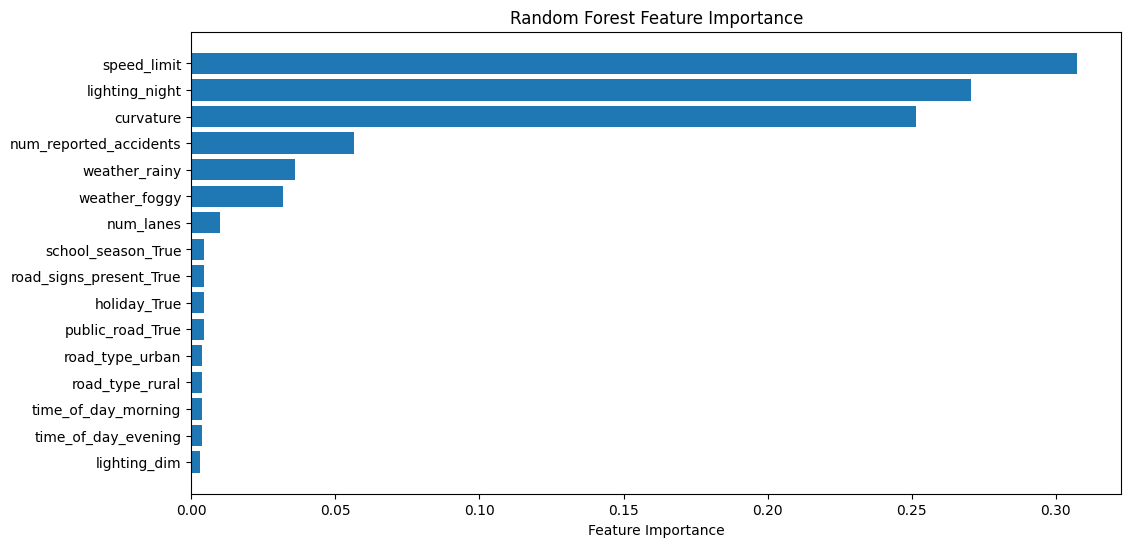

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is f_df
df = f_df.copy()

# Separate features and target
X = df.drop(columns='accident_risk')
y = df['accident_risk']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocess categorical variables with OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # keep numerical columns as is
)

# Transform features
X_encoded = preprocessor.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Feature importance
importances = rf.feature_importances_

# Get feature names after OneHotEncoding
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(feature_names) + list(numerical_cols)

# Create importance dataframe
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12,6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [45]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
# import matplotlib.pyplot as plt
# import pandas as pd

# df_rf = f_df.copy()

# text_cols = [
#     'road_type', 'lighting', 'weather', 'curvature_category',
#     'time_of_day', 'school_season', 'holiday', 'road_signs_present'
# ]

# # Force to string, then encode
# for col in text_cols:
#     if col in df_rf.columns:
#         df_rf[col] = df_rf[col].astype(str)
#         df_rf[col], _ = pd.factorize(df_rf[col])

# X = df_rf.drop(columns=['accident_risk','num_reported_accidents'])
# y = df_rf['accident_risk']

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, y)

# perm = permutation_importance(
#     rf, X, y,
#     n_repeats=30,
#     random_state=42
# )

# perm_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': perm.importances_mean,
#     'Std': perm.importances_std
# }).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(
#     perm_df['Feature'],
#     perm_df['Importance'],
#     xerr=perm_df['Std'],
#     color='teal'
# )
# plt.xlabel('Permutation Importance (Δ R²)')
# plt.title('Random Forest Permutation Importance')
# plt.gca().invert_yaxis()
# plt.show()

# print(perm_df)


✓ Data types prepared for FAMD

--- Explained Variance per Component ---
Component 1: 10.22%
Component 2: 10.16%
Component 3: 10.11%
Component 4: 10.08%
Component 5: 10.03%
Component 6: 9.98%
Component 7: 9.91%
Component 8: 9.87%
Component 9: 9.85%
Component 10: 9.80%


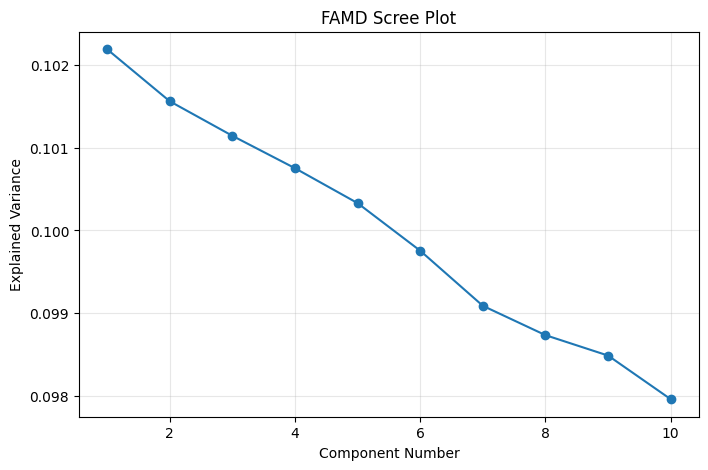

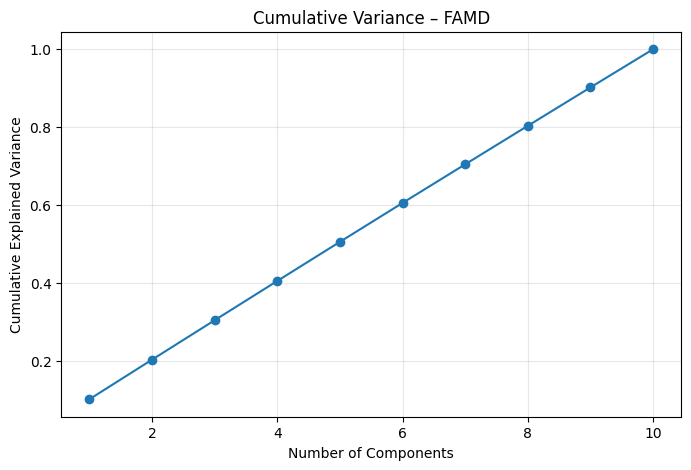


--- Variable Contributions to Components ---
component           0         1         2         3         4         5  \
variable                                                                  
curvature    0.000009  0.000001  0.000002  0.000002  0.000018  0.000022   
holiday      0.003136  0.032915  0.024288  0.001590  0.007388  0.004102   
lighting     0.005672  0.052175  0.027223  0.014783  0.016533  0.014546   
num_lanes    0.025463  0.028585  0.047808  0.046875  0.026396  0.034203   
public_road  0.051756  0.001355  0.013063  0.001682  0.008119  0.000247   

component           6         7         8         9  
variable                                             
curvature    0.000015  0.000003  0.000021  0.000009  
holiday      0.020486  0.006804  0.001372  0.006443  
lighting     0.007981  0.033313  0.009021  0.018086  
num_lanes    0.049188  0.033089  0.008049  0.032512  
public_road  0.002519  0.011052  0.012107  0.001362  


In [46]:
from prince import FAMD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ------------------------------------------------
# 1. Define features (NO target, NO clustering)
# ------------------------------------------------
features = [
    'road_type', 'num_lanes', 'curvature', 'speed_limit',
    'lighting', 'weather', 'road_signs_present', 'public_road',
    'time_of_day', 'holiday', 'school_season'
]

# ------------------------------------------------
# 2. Sample data (optional but recommended)
# ------------------------------------------------
sample_df = f_df.sample(n=30000, random_state=42)
X = sample_df[features].copy()

# ------------------------------------------------
# 3. Prepare data types for FAMD
# ------------------------------------------------
categorical_features = [
    'road_type', 'lighting', 'weather',
    'road_signs_present', 'public_road',
    'holiday', 'school_season', 'time_of_day'
]

numerical_features = ['num_lanes', 'curvature', 'speed_limit']

# Convert categorical to string (IMPORTANT for prince)
for col in categorical_features:
    X[col] = X[col].astype(str)

print("✓ Data types prepared for FAMD")

# ------------------------------------------------
# 4. Run FAMD (increase components for scree plot)
# ------------------------------------------------
famd = FAMD(
    n_components=10,
    n_iter=5,
    random_state=42
)

famd_components = famd.fit_transform(X)

# ------------------------------------------------
# 5. Component scores (OUTPUT)
# ------------------------------------------------
famd_df = pd.DataFrame(
    famd_components,
    columns=[f'Component_{i+1}' for i in range(famd_components.shape[1])]
)


# ------------------------------------------------
# 6. Explained variance (VERSION-SAFE)
# ------------------------------------------------
eigenvalues = famd.eigenvalues_
explained_variance = eigenvalues / eigenvalues.sum()

print("\n--- Explained Variance per Component ---")
for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var*100:.2f}%")

# ------------------------------------------------
# 7. Scree plot
# ------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance,
    marker='o'
)
plt.xlabel("Component Number")
plt.ylabel("Explained Variance")
plt.title("FAMD Scree Plot")
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------------
# 8. Cumulative explained variance
# ------------------------------------------------
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance – FAMD")
plt.grid(alpha=0.3)
plt.show()

# ------------------------------------------------
# 9. Variable contributions (interpretation)
# ------------------------------------------------
print("\n--- Variable Contributions to Components ---")
var_contrib = famd.column_contributions_
print(var_contrib.head())


In [47]:

from kmodes.kprototypes import KPrototypes

num_cols = [
    'num_lanes',
    'curvature',
    'speed_limit'
]

cat_cols = [
    'road_type',
    'lighting',
    'weather',
    'road_signs_present',
    'public_road',
    'time_of_day',
    'holiday',
    'school_season'
]

X = f_df[num_cols + cat_cols]

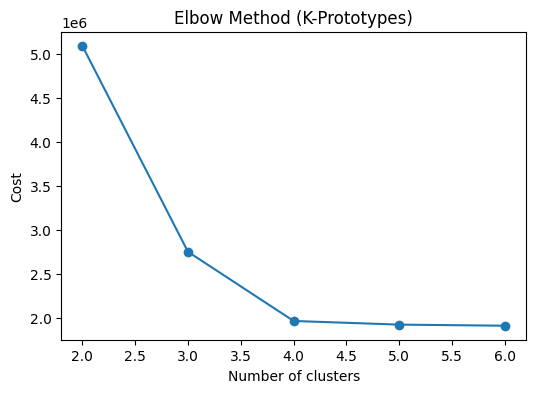

In [48]:
X_np = X.to_numpy()
cat_idx = [X.columns.get_loc(col) for col in cat_cols]

cost = []

for k in range(2, 7):
    kproto = KPrototypes(
        n_clusters=k,
        init='Cao',
        random_state=42,
        n_init=5
    )
    kproto.fit_predict(X_np, categorical=cat_idx)
    cost.append(kproto.cost_)

plt.figure(figsize=(6,4))
plt.plot(range(2,7), cost, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method (K-Prototypes)")
plt.show()


In [49]:
k = 3  # choose from elbow

kproto = KPrototypes(
    n_clusters=k,
    init='Cao',
    random_state=42,
    n_init=10
)

f_df['cluster'] = kproto.fit_predict(
    X_np,
    categorical=cat_idx
)


In [50]:
print(f_df['cluster'].value_counts())

print(f_df.groupby('cluster')['accident_risk'].mean())




cluster
1    31491
2    31227
0    15654
Name: count, dtype: int64
cluster
0    0.302638
1    0.503213
2    0.302463
Name: accident_risk, dtype: float64


In [51]:
for col in cat_cols:
    print("\n", col)
    print(pd.crosstab(f_df['cluster'], f_df[col], normalize='index'))



 road_type
road_type   highway     rural     urban
cluster                                
0          0.334036  0.331353  0.334611
1          0.333556  0.331269  0.335175
2          0.337016  0.329971  0.333013

 lighting
lighting  daylight       dim     night
cluster                               
0         0.326306  0.335697  0.337997
1         0.331682  0.334762  0.333556
2         0.334230  0.333686  0.332084

 weather
weather     clear     foggy     rainy
cluster                              
0        0.339913  0.331609  0.328478
1        0.336604  0.333079  0.330317
2        0.336215  0.333718  0.330067

 road_signs_present
road_signs_present     False     True 
cluster                               
0                   0.493229  0.506771
1                   0.503096  0.496904
2                   0.501073  0.498927

 public_road
public_road     False     True 
cluster                        
0            0.509838  0.490162
1            0.500492  0.499508
2            0.497870  0

In [52]:
def summarize_cluster(df, cluster_id, num_cols, cat_cols):
    cluster_df = df[df['cluster'] == cluster_id]
    n = len(cluster_df)

    print(f"\nCLUSTER {cluster_id} (n={n})")
    print("=" * 60)

    # -----------------------------
    # Risk statistics
    # -----------------------------
    if 'accident_risk' in df.columns:
        print("\nRisk Statistics:")
        print(f"  Mean accident_risk: {cluster_df['accident_risk'].mean():.4f}")

    # -----------------------------
    # Categorical characteristics
    # -----------------------------
    print("\nTop Characteristics:")
    for col in cat_cols:
        top_label = cluster_df[col].value_counts().idxmax()
        top_pct = (
            cluster_df[col]
            .value_counts(normalize=True)
            .iloc[0] * 100
        )
        print(f"  {col}: {top_label} ({top_pct:.1f}%)")

    # -----------------------------
    # Numerical averages
    # -----------------------------
    print("\nNumerical averages:")
    for col in num_cols:
        print(f"  {col}: {cluster_df[col].mean():.2f}")


In [53]:
for c in sorted(f_df['cluster'].unique()):
    summarize_cluster(
        f_df,
        cluster_id=c,
        num_cols=num_cols,
        cat_cols=cat_cols
    )



CLUSTER 0 (n=15654)

Risk Statistics:
  Mean accident_risk: 0.3026

Top Characteristics:
  road_type: urban (33.5%)
  lighting: night (33.8%)
  weather: clear (34.0%)
  road_signs_present: True (50.7%)
  public_road: False (51.0%)
  time_of_day: morning (34.1%)
  holiday: True (50.7%)
  school_season: True (50.3%)

Numerical averages:
  num_lanes: 2.48
  curvature: 0.50
  speed_limit: 45.00

CLUSTER 1 (n=31491)

Risk Statistics:
  Mean accident_risk: 0.5032

Top Characteristics:
  road_type: urban (33.5%)
  lighting: dim (33.5%)
  weather: clear (33.7%)
  road_signs_present: False (50.3%)
  public_road: False (50.0%)
  time_of_day: afternoon (33.5%)
  holiday: True (50.2%)
  school_season: False (50.2%)

Numerical averages:
  num_lanes: 2.50
  curvature: 0.50
  speed_limit: 65.06

CLUSTER 2 (n=31227)

Risk Statistics:
  Mean accident_risk: 0.3025

Top Characteristics:
  road_type: highway (33.7%)
  lighting: daylight (33.4%)
  weather: clear (33.6%)
  road_signs_present: False (50.1%)

In [54]:
# install scikit-posthocs if not present
%pip install scikit-posthocs -q

from scikit_posthocs import posthoc_dunn

print("\n================ NUMERICAL VARIABLES =================")

for var in num_cols:
    print(f"\n--- {var.upper()} ---")

    groups = [
        f_df[f_df['cluster'] == c][var].dropna()
        for c in sorted(f_df['cluster'].unique())
    ]

    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis p-value: {p:.4e}")

    if p < 0.05:
        print("→ Significant difference detected")

        # Dunn's post-hoc test
        dunn = posthoc_dunn(
            f_df,
            val_col=var,
            group_col='cluster',
            p_adjust='bonferroni'
        )

        print("\nDunn's post-hoc (Bonferroni-adjusted):")
        print(dunn)
    else:
        print("→ No significant difference between clusters")


Note: you may need to restart the kernel to use updated packages.

================ NUMERICAL VARIABLES =================

--- NUM_LANES ---
Kruskal-Wallis p-value: 2.3920e-01
→ No significant difference between clusters

--- CURVATURE ---
Kruskal-Wallis p-value: 8.2839e-01
→ No significant difference between clusters

--- SPEED_LIMIT ---
Kruskal-Wallis p-value: 0.0000e+00
→ Significant difference detected

Dunn's post-hoc (Bonferroni-adjusted):
     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
groups = [f_df[f_df.cluster == c]['accident_risk'] for c in f_df.cluster.unique()]
kruskal(*groups)

KruskalResult(statistic=np.float64(23634.47722664697), pvalue=np.float64(0.0))

In [55]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

print("\n================ CATEGORICAL VARIABLES =================")

for var in cat_cols:
    print(f"\n--- {var.upper()} ---")

    contingency = pd.crosstab(f_df[var], f_df['cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"Chi-square p-value: {p:.4e}")

    if p < 0.05:
        print("→ Significant association with cluster")

        v = cramers_v(contingency)
        print(f"Cramér’s V (effect size): {v:.3f}")
    else:
        print("→ No significant association with cluster")



================ CATEGORICAL VARIABLES =================

--- ROAD_TYPE ---
Chi-square p-value: 9.1767e-01
→ No significant association with cluster

--- LIGHTING ---
Chi-square p-value: 5.2236e-01
→ No significant association with cluster

--- WEATHER ---
Chi-square p-value: 9.4922e-01
→ No significant association with cluster

--- ROAD_SIGNS_PRESENT ---
Chi-square p-value: 1.2304e-01
→ No significant association with cluster

--- PUBLIC_ROAD ---
Chi-square p-value: 4.6991e-02
→ Significant association with cluster
Cramér’s V (effect size): 0.009

--- TIME_OF_DAY ---
Chi-square p-value: 3.2968e-01
→ No significant association with cluster

--- HOLIDAY ---
Chi-square p-value: 5.3368e-01
→ No significant association with cluster

--- SCHOOL_SEASON ---
Chi-square p-value: 4.8095e-01
→ No significant association with cluster


In [56]:
from itertools import combinations

def pairwise_chi_square(df, var):
    clusters = sorted(df['cluster'].unique())
    print(f"\nPairwise Chi-square for {var}")

    for c1, c2 in combinations(clusters, 2):
        sub = df[df['cluster'].isin([c1, c2])]
        table = pd.crosstab(sub[var], sub['cluster'])

        chi2, p, _, _ = chi2_contingency(table)
        print(f"Cluster {c1} vs {c2}: p = {p:.4e}")


In [57]:
pairwise_chi_square(f_df, 'road_type')



Pairwise Chi-square for road_type
Cluster 0 vs 1: p = 9.9134e-01
Cluster 0 vs 2: p = 8.1234e-01
Cluster 1 vs 2: p = 6.5074e-01


In [58]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def hopkins(X, sampling_size=0.1, random_state=42):
    np.random.seed(random_state)

    if isinstance(X, pd.DataFrame):
        X = X.values

    # scale 0-1 for consistency
    X = MinMaxScaler().fit_transform(X)

    n_samples = X.shape[0]
    d = X.shape[1]

    m = int(np.ceil(sampling_size * n_samples))

    # sample real points
    idx = np.random.choice(range(n_samples), m, replace=False)
    X_real = X[idx]

    # generate random points
    X_random = np.random.uniform(size=(m, d))

    nn_real = NearestNeighbors(n_neighbors=2).fit(X)
    nn_random = NearestNeighbors(n_neighbors=1).fit(X)

    # distances for real points (skip self-nearest)
    u = []
    for x in X_real:
        dist, ind = nn_real.kneighbors([x], n_neighbors=2)
        u.append(dist.flatten()[1])

    # distances for random points
    w = []
    for x in X_random:
        dist, ind = nn_random.kneighbors([x], n_neighbors=1)
        w.append(dist.flatten()[0])

    H = sum(w) / (sum(w) + sum(u))
    return H


In [59]:
H = hopkins(f_df[['num_lanes','curvature','speed_limit']])
print("Hopkins Statistic =", H)


Hopkins Statistic = 1.0


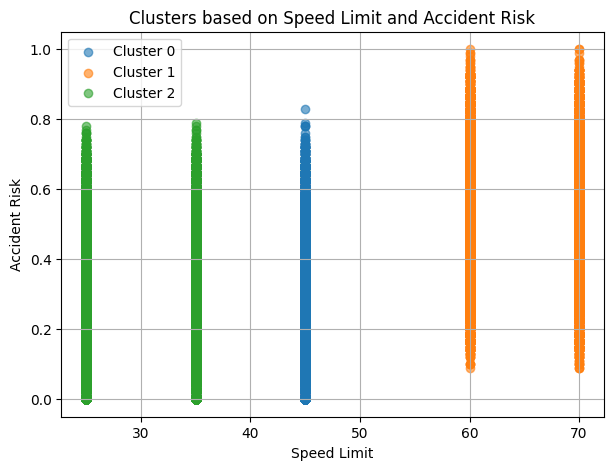

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

for c in sorted(f_df['cluster'].unique()):
    subset = f_df[f_df['cluster'] == c]
    plt.scatter(
        subset['speed_limit'],
        subset['accident_risk'],
        label=f'Cluster {c}',
        alpha=0.6
    )

plt.xlabel("Speed Limit")
plt.ylabel("Accident Risk")
plt.title("Clusters based on Speed Limit and Accident Risk")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 700x500 with 0 Axes>

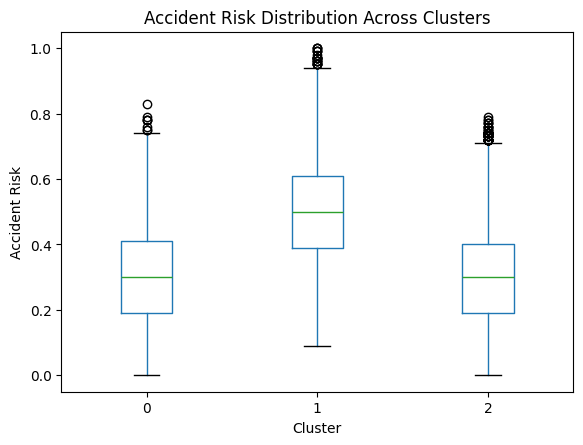

In [61]:
plt.figure(figsize=(7, 5))

f_df.boxplot(
    column='accident_risk',
    by='cluster',
    grid=False
)

plt.xlabel("Cluster")
plt.ylabel("Accident Risk")
plt.title("Accident Risk Distribution Across Clusters")
plt.suptitle("")  # remove automatic title
plt.show()


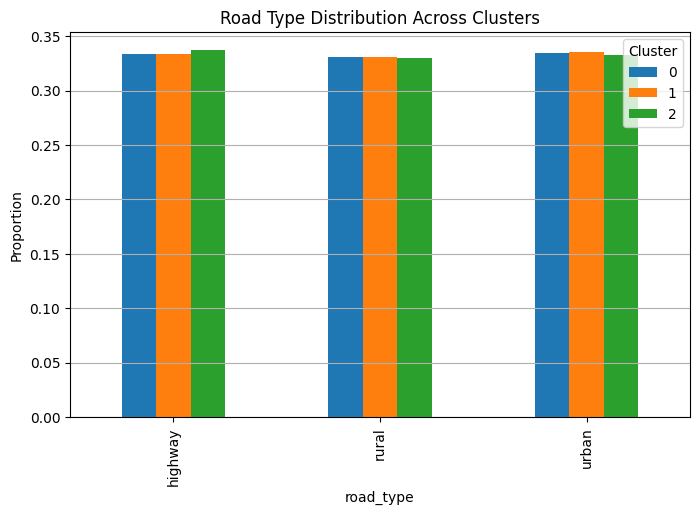

In [62]:
road_cluster = pd.crosstab(
    f_df['road_type'],
    f_df['cluster'],
    normalize='columns'
)

road_cluster.plot(
    kind='bar',
    figsize=(8, 5)
)

plt.ylabel("Proportion")
plt.title("Road Type Distribution Across Clusters")
plt.legend(title="Cluster")
plt.grid(axis='y')
plt.show()


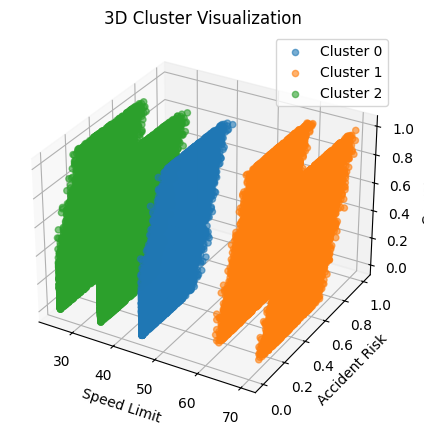

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

for c in sorted(f_df['cluster'].unique()):
    subset = f_df[f_df['cluster'] == c]
    ax.scatter(
        subset['speed_limit'],
        subset['accident_risk'],
        subset['curvature'],
        label=f'Cluster {c}',
        alpha=0.6
    )

ax.set_xlabel("Speed Limit")
ax.set_ylabel("Accident Risk")
ax.set_zlabel("Curvature")
ax.set_title("3D Cluster Visualization")
ax.legend()
plt.show()
